In [8]:
import os

# Path to the 'test' folder
folder_path = 'test'

# Get all WAV files in the 'test' directory without the file extension
wav_files_without_extension = [os.path.splitext(file)[0] for file in os.listdir(folder_path) if file.endswith('.wav')]

# Convert the list of filenames to a single string separated by commas
filenames_as_string = ', '.join(wav_files_without_extension)

print(filenames_as_string)


voice_german_pure_cut_24kHz, rain_traffic_sound_cut_48khz, ar_speak_radio_quran_long_8khz, song_hip_hop_cut_48khz, es_speak_noize_cut_48khz, voice_german_pure_cut_48khz, es_speak_noize_cut_24kHz, rain_traffic_sound_cut_24kHz, song_hip_hop_cut_24kHz


## Deps

## Encodec

In [9]:
import openvino as ov

core = ov.Core()

In [1]:
from encodec import EncodecModel, compress, decompress
from encodec.utils import convert_audio, save_audio
import torchaudio
import torch
import typing as tp

# Instantiate a pretrained EnCodec model
model = EncodecModel.encodec_model_48khz()
# model = EncodecModel.encodec_model_24khz()
model.set_target_bandwidth(6.0)
model.channels = 2

In [2]:
file_name_no_path = "song_hip_hop_cut_48kHz"
file_name = f'test/{file_name_no_path}.wav'

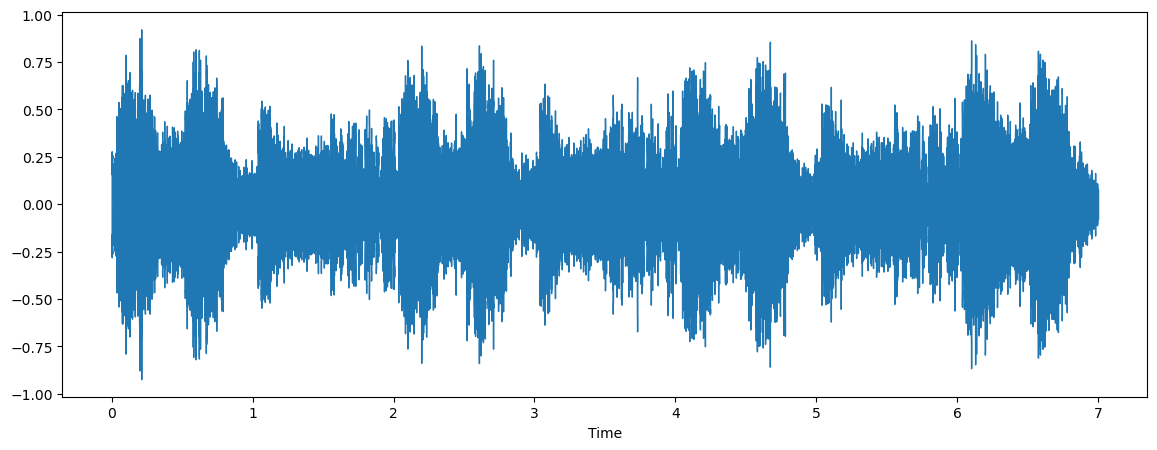

In [3]:
import sys
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

sys.path.append("../utils")

# download_file(test_data_url, sample_file)
audio, sr = librosa.load(file_name)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)

ipd.Audio(file_name)


In [4]:
model_sr, model_channels = model.sample_rate, model.channels
print(f"Model expected sample rate {model_sr}")
print(f"Model expected audio format {'mono' if model_channels == 1 else 'stereo'}")

Model expected sample rate 48000
Model expected audio format stereo


In [5]:
import os

folder_path = 'test'  # Replace 'your_folder_path' with the actual folder path

# Get all files in the specified folder
files = os.listdir(folder_path)

# Remove files containing '.ecdc' in their filenames
for file_name in files:
    if '.ecdc' in file_name:
        file_path = os.path.join(folder_path, file_name)
        
        # Check if the file exists and then remove it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Removed {file_name}")


In [202]:
import os

folder_path = 'ecdc_wav_test'  # Replace 'your_folder_path' with the actual folder path

# Get all files in the specified folder
files = os.listdir(folder_path)

# Rename files by removing '.ecdc' from the filenames
for file_name in files:
    if '.ecdc' in file_name:
        old_file_path = os.path.join(folder_path, file_name)
        new_file_name = file_name.replace('.ecdc', '')  # Remove '.ecdc' from the filename
        
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed {file_name} to {new_file_name}")


Renamed voice_german_pure_cut_48khz.ecdc.wav to voice_german_pure_cut_48khz.wav
Renamed voice_german_pure_cut_24kHz.ecdc.wav to voice_german_pure_cut_24kHz.wav
Renamed ar_speak_radio_quran_long_8khz.ecdc.wav to ar_speak_radio_quran_long_8khz.wav
Renamed rain_traffic_sound_cut_48khz.ecdc.wav to rain_traffic_sound_cut_48khz.wav
Renamed es_speak_noize_cut_48kHz.ecdc.wav to es_speak_noize_cut_48kHz.wav
Renamed es_speak_noize_cut_24kHz.ecdc.wav to es_speak_noize_cut_24kHz.wav
Renamed rain_traffic_sound_cut_24kHz.ecdc.wav to rain_traffic_sound_cut_24kHz.wav
Renamed song_hip_hop_cut_24kHz.ecdc.wav to song_hip_hop_cut_24kHz.wav
Renamed song_hip_hop_cut_48khz.ecdc.wav to song_hip_hop_cut_48khz.wav


In [10]:
# Load and pre-process the audio waveform
wav, sr = torchaudio.load(file_name)

wav = convert_audio(wav, sr, model_sr, model_channels)

LibsndfileError: Error opening 'song_hip_hop_cut_24kHz.wav': System error.

In [15]:

import os

# Path to the folder containing the files
folder_path = 'ecdc'

# Get all files in the folder
all_files = os.listdir(folder_path)

for file in all_files: 
    out_file_file = Path(f'ecdc/{file}')
    out, out_sr = decompress(out_file_file.read_bytes())
    output_file = f'ecdc_wav_test/{file}.wav'
    save_audio(out, output_file, out_sr)


LibsndfileError: Error opening 'ecdc_wav_test/voice_german_pure_cut_48khz.ecdc.wav': System error.

In [13]:
from pathlib import Path


out_file = Path(f'{file_name.removesuffix(".wav")}.ecdc')
b = compress(model, wav)
out_file.write_bytes(b)

NameError: name 'wav' is not defined

In [194]:
import os

orig_file_stats = os.stat(file_name)
compressed_file_stats = os.stat(f'ecdc/{file_name.removesuffix(".wav").removeprefix("test/")}.ecdc')
print(f"size before compression in Bytes: {orig_file_stats.st_size}")
print(f"size after compression in Bytes: {compressed_file_stats.st_size}")
print(f"Compression file size ratio: {orig_file_stats.st_size / compressed_file_stats.st_size:.2f}")

size before compression in Bytes: 336044
size after compression in Bytes: 5317
Compression file size ratio: 63.20


In [195]:
out, out_sr = decompress(out_file.read_bytes())

FileNotFoundError: [Errno 2] No such file or directory: 'test/song_hip_hop_cut_24kHz.ecdc'

In [197]:
output_file = f'ecdc_wav/file_name.wav'
save_audio(out, output_file, out_sr)

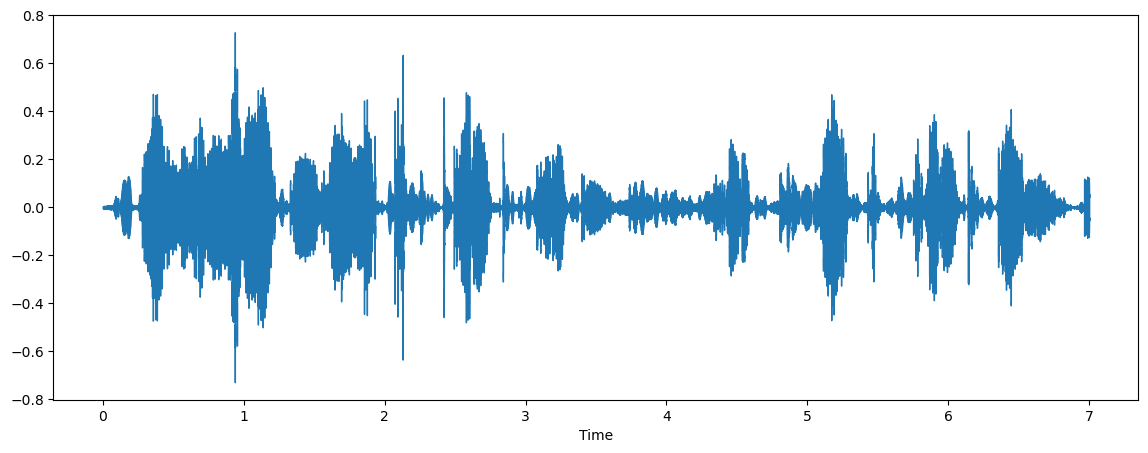

In [187]:
audio, sr = librosa.load(output_file)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)

ipd.Audio(output_file)

In [4]:
import numpy as np
import os
import librosa

## Cut to 7 secs

In [10]:
import os
import librosa
import soundfile as sf

# Directory containing the original audio files (replace 'input_folder' with your folder path)
input_directory = 'test'

# Directory to save the truncated audio files (replace 'output_folder' with your desired folder path)
output_directory = 'output_folder'

# Target duration in seconds
target_duration = 7

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
file_list = os.listdir(input_directory)

# Filter only .wav files
wav_files = [file for file in file_list if file.endswith('.wav')]

# Process each .wav file
for wav_file in wav_files:
    input_file_path = os.path.join(input_directory, wav_file)
    
    # Load audio file using librosa
    audio_data, sr = librosa.load(input_file_path, sr=None)
    
    # Calculate the number of samples for the target duration
    target_samples = int(target_duration * sr)
    
    # Trim or pad the audio to match the target duration
    if len(audio_data) > target_samples:
        # Trim excess samples if the audio is longer than the target duration
        audio_data = audio_data[:target_samples]
    else:
        # Pad with zeros if the audio is shorter than the target duration
        audio_data = librosa.util.pad_center(audio_data, target_samples)
    
    # Create output file name (appending '_cut' to the original filename)
    output_file_name = f"{os.path.splitext(wav_file)[0]}_cut.wav"
    output_file_path = os.path.join(output_directory, output_file_name)
    
    # Save the truncated audio to a new file using soundfile
    sf.write(output_file_path, audio_data, sr)
    
    print(f"File {wav_file} processed and saved as {output_file_name}")


File voice_german_pure.wav processed and saved as voice_german_pure_cut.wav
File rain_traffic_sound.wav processed and saved as rain_traffic_sound_cut.wav
File es_speak_noize.wav processed and saved as es_speak_noize_cut.wav
File song_hip_hop.wav processed and saved as song_hip_hop_cut.wav


## Convert MP3

In [214]:
from pydub import AudioSegment
import os
import time

# Directories
input_folder = 'test'
output_folder = 'mp3'

# Create 'mp3' directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all WAV files in the 'test' directory
wav_files = [file for file in os.listdir(input_folder) if file.endswith('.wav')]

# Convert each WAV file to MP3
for wav_file in wav_files:
    input_path = os.path.join(input_folder, wav_file)
    output_path = os.path.join(output_folder, os.path.splitext(wav_file)[0] + '.mp3')

    # Load the WAV audio
    start_time = time.time()  # Start time
    audio = AudioSegment.from_wav(input_path)
    end_time = time.time()  # End time for loading WAV

    # Export the audio to MP3 format
    start_export_time = time.time()  # Start time for exporting MP3
    audio.export(output_path, format="mp3")
    end_export_time = time.time()  # End time for exporting MP3

    # Calculate processing time and compression ratio
    loading_time = end_time - start_time
    export_time = end_export_time - start_export_time
    total_time = loading_time + export_time

    wav_size = os.path.getsize(input_path)
    mp3_size = os.path.getsize(output_path)
    compression_ratio = (wav_size/mp3_size)  # Calculate compression ratio as a percentage

    print(f"Converted {wav_file} to MP3")
    print(f"Compression Ratio: {compression_ratio:.2f}")
    print(f"Processing Time (Load WAV): {loading_time:.2f} seconds")
    print(f"Processing Time (Export MP3): {export_time:.2f} seconds")
    print(f"Total Processing Time: {total_time:.2f} seconds\n")


Converted voice_german_pure_cut_24kHz.wav to MP3
Compression Ratio: 11.81
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export MP3): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted rain_traffic_sound_cut_48khz.wav to MP3
Compression Ratio: 11.90
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export MP3): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted ar_speak_radio_quran_long_8khz.wav to MP3
Compression Ratio: 21.35
Processing Time (Load WAV): 1.15 seconds
Processing Time (Export MP3): 1.05 seconds
Total Processing Time: 2.20 seconds

Converted song_hip_hop_cut_48khz.wav to MP3
Compression Ratio: 10.94
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export MP3): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted es_speak_noize_cut_48khz.wav to MP3
Compression Ratio: 10.94
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export MP3): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted voice_german_pure_c

In [38]:
from pydub import AudioSegment
import os

# Directory containing the original audio files (replace 'test_folder' with your folder path)
input_directory = 'test'

# Directory to save the compressed MP3 files (replace 'output_folder' with your desired folder path)
output_directory = 'mp3'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
file_list = os.listdir(input_directory)

# Filter only .wav files
wav_files = [file for file in file_list if file.endswith('.wav')]

# Process each .wav file
for wav_file in wav_files:
    input_file_path = os.path.join(input_directory, wav_file)
    
    # Load audio file using pydub
    audio = AudioSegment.from_wav(input_file_path)
    
    # Create output file name (change the extension to '.mp3')
    output_file_name = os.path.splitext(wav_file)[0] + '.mp3'
    output_file_path = os.path.join(output_directory, output_file_name)
    
    # Export the audio to MP3 format
    audio.export(output_file_path, format='mp3')
    
    print(f"File {wav_file} compressed and saved as {output_file_name}")

File voice_german_pure_cut_24kHz.wav compressed and saved as voice_german_pure_cut_24kHz.mp3
File rain_traffic_sound_cut_48khz.wav compressed and saved as rain_traffic_sound_cut_48khz.mp3
File ar_speak_radio_quran_long_8khz.wav compressed and saved as ar_speak_radio_quran_long_8khz.mp3
File song_hip_hop_cut_48khz.wav compressed and saved as song_hip_hop_cut_48khz.mp3
File es_speak_noize_cut_48khz.wav compressed and saved as es_speak_noize_cut_48khz.mp3
File voice_german_pure_cut_48khz.wav compressed and saved as voice_german_pure_cut_48khz.mp3
File es_speak_noize_cut_24kHz.wav compressed and saved as es_speak_noize_cut_24kHz.mp3
File rain_traffic_sound_cut_24kHz.wav compressed and saved as rain_traffic_sound_cut_24kHz.mp3
File song_hip_hop_cut_24kHz.wav compressed and saved as song_hip_hop_cut_24kHz.mp3


## Convert to FLAC

In [43]:
from pydub import AudioSegment
import os

folder_path = 'test'
output_folder = 'flac'

# Create 'flac' directory if it doesn't exist
output_path = os.path.join(folder_path, output_folder)
os.makedirs(output_path, exist_ok=True)

# Check if the 'test' directory exists
if not os.path.exists(folder_path):
    print(f"Directory '{folder_path}' does not exist.")
    exit()

# Get all audio files (assuming they are in WAV format)
wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Convert each audio file to FLAC
for wav_file in wav_files:
    input_path = os.path.join(folder_path, wav_file)
    output_file = f"{os.path.splitext(wav_file)[0]}.flac"
    output_path = os.path.join(folder_path, output_folder, output_file)

    # Load the audio file
    audio = AudioSegment.from_wav(input_path)

    # Export the converted audio file to FLAC format
    audio.export(output_path, format="flac")

    print(f"Converted {wav_file} to FLAC in '{output_folder}' directory")


Converted voice_german_pure_cut_24kHz.wav to FLAC in 'flac' directory
Converted rain_traffic_sound_cut_48khz.wav to FLAC in 'flac' directory
Converted ar_speak_radio_quran_long_8khz.wav to FLAC in 'flac' directory
Converted song_hip_hop_cut_48khz.wav to FLAC in 'flac' directory
Converted es_speak_noize_cut_48khz.wav to FLAC in 'flac' directory
Converted voice_german_pure_cut_48khz.wav to FLAC in 'flac' directory
Converted es_speak_noize_cut_24kHz.wav to FLAC in 'flac' directory
Converted rain_traffic_sound_cut_24kHz.wav to FLAC in 'flac' directory
Converted song_hip_hop_cut_24kHz.wav to FLAC in 'flac' directory


In [42]:
import os

folder_path = 'test'

# Check if the 'test' directory exists
if not os.path.exists(folder_path):
    print(f"Directory '{folder_path}' does not exist.")
    exit()

# Get all FLAC files in the 'test' directory
flac_files = [file for file in os.listdir(folder_path) if file.endswith('.flac')]

# Delete each FLAC file
for flac_file in flac_files:
    file_path = os.path.join(folder_path, flac_file)
    os.remove(file_path)
    print(f"Deleted {flac_file} from 'test' directory")


Deleted song_hip_hop_cut_24kHz.flac from 'test' directory
Deleted es_speak_noize_cut_48khz.flac from 'test' directory
Deleted voice_german_pure_cut_24kHz.flac from 'test' directory
Deleted rain_traffic_sound_cut_24kHz.flac from 'test' directory
Deleted ar_speak_radio_quran_long_8khz.flac from 'test' directory
Deleted song_hip_hop_cut_48khz.flac from 'test' directory
Deleted es_speak_noize_cut_24kHz.flac from 'test' directory
Deleted voice_german_pure_cut_48khz.flac from 'test' directory
Deleted rain_traffic_sound_cut_48khz.flac from 'test' directory


## Convert to OPUS

In [211]:
from pydub import AudioSegment
import os

# Directory containing the original WAV files (replace 'test_folder' with your folder path)
input_directory = 'test'

# Directory to save the converted Opus files (replace 'output_folder' with your desired folder path)
output_directory = 'opus'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
file_list = os.listdir(input_directory)

# Filter only .wav files
wav_files = [file for file in file_list if file.endswith('.wav')]

# Process each .wav file
for wav_file in wav_files:
    input_file_path = os.path.join(input_directory, wav_file)
    
    # Load the original WAV audio file using pydub
    audio = AudioSegment.from_wav(input_file_path)
    
    # Create output file name (change the extension to '.opus')
    output_file_name = os.path.splitext(wav_file)[0] + '.opus'
    output_file_path = os.path.join(output_directory, output_file_name)
    
    # Export the audio to Opus format
    audio.export(output_file_path, format='opus')
    
    print(f"File {wav_file} converted to Opus and saved as {output_file_name}")


File voice_german_pure_cut_24kHz.wav converted to Opus and saved as voice_german_pure_cut_24kHz.opus
File rain_traffic_sound_cut_48khz.wav converted to Opus and saved as rain_traffic_sound_cut_48khz.opus
File ar_speak_radio_quran_long_8khz.wav converted to Opus and saved as ar_speak_radio_quran_long_8khz.opus
File song_hip_hop_cut_48khz.wav converted to Opus and saved as song_hip_hop_cut_48khz.opus
File es_speak_noize_cut_48khz.wav converted to Opus and saved as es_speak_noize_cut_48khz.opus
File voice_german_pure_cut_48khz.wav converted to Opus and saved as voice_german_pure_cut_48khz.opus
File es_speak_noize_cut_24kHz.wav converted to Opus and saved as es_speak_noize_cut_24kHz.opus
File rain_traffic_sound_cut_24kHz.wav converted to Opus and saved as rain_traffic_sound_cut_24kHz.opus
File song_hip_hop_cut_24kHz.wav converted to Opus and saved as song_hip_hop_cut_24kHz.opus


In [215]:
from pydub import AudioSegment
import os
import time

# Directories
input_folder = 'test'
output_folder = 'opus'

# Create 'opus' directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all WAV files in the 'test' directory
wav_files = [file for file in os.listdir(input_folder) if file.endswith('.wav')]

# Convert each WAV file to Opus
for wav_file in wav_files:
    input_path = os.path.join(input_folder, wav_file)
    output_path = os.path.join(output_folder, os.path.splitext(wav_file)[0] + '.opus')

    # Load the WAV audio
    start_time = time.time()  # Start time
    audio = AudioSegment.from_wav(input_path)
    end_time = time.time()  # End time for loading WAV

    # Export the audio to Opus format
    start_export_time = time.time()  # Start time for exporting Opus
    audio.export(output_path, format="opus")
    end_export_time = time.time()  # End time for exporting Opus

    # Calculate processing time and compression ratio
    loading_time = end_time - start_time
    export_time = end_export_time - start_export_time
    total_time = loading_time + export_time

    wav_size = os.path.getsize(input_path)
    opus_size = os.path.getsize(output_path)
    compression_ratio = wav_size / opus_size 
    print(f"Converted {wav_file} to Opus")
    print(f"Compression Ratio: {compression_ratio:.2f}%")
    print(f"Processing Time (Load WAV): {loading_time:.2f} seconds")
    print(f"Processing Time (Export Opus): {export_time:.2f} seconds")
    print(f"Total Processing Time: {total_time:.2f} seconds\n")


Converted voice_german_pure_cut_24kHz.wav to Opus
Compression Ratio: 5.00%
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export Opus): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted rain_traffic_sound_cut_48khz.wav to Opus
Compression Ratio: 13.30%
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export Opus): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted ar_speak_radio_quran_long_8khz.wav to Opus
Compression Ratio: 2.81%
Processing Time (Load WAV): 1.14 seconds
Processing Time (Export Opus): 2.35 seconds
Total Processing Time: 3.48 seconds

Converted song_hip_hop_cut_48khz.wav to Opus
Compression Ratio: 10.66%
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export Opus): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted es_speak_noize_cut_48khz.wav to Opus
Compression Ratio: 11.48%
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export Opus): 0.08 seconds
Total Processing Time: 0.08 seconds

Converted voice_

## Get files

In [11]:
directory = 'test'
file_list = os.listdir(directory)

wav_files = [file for file in file_list if file.endswith('.wav')]

for wav_file in wav_files:
    file_path = os.path.join(directory, wav_file)
    
    audio_data, sr = librosa.load(file_path, sr=None)
    
    duration = librosa.get_duration(y=audio_data, sr=sr)
    
    print(f"File: {wav_file} | Duration: {duration:.2f} seconds")

File: es_speak_noize_cut.wav | Duration: 7.00 seconds
File: rain_traffic_sound_cut.wav | Duration: 7.00 seconds
File: voice_german_pure_cut.wav | Duration: 7.00 seconds
File: song_hip_hop_cut.wav | Duration: 7.00 seconds


## THD

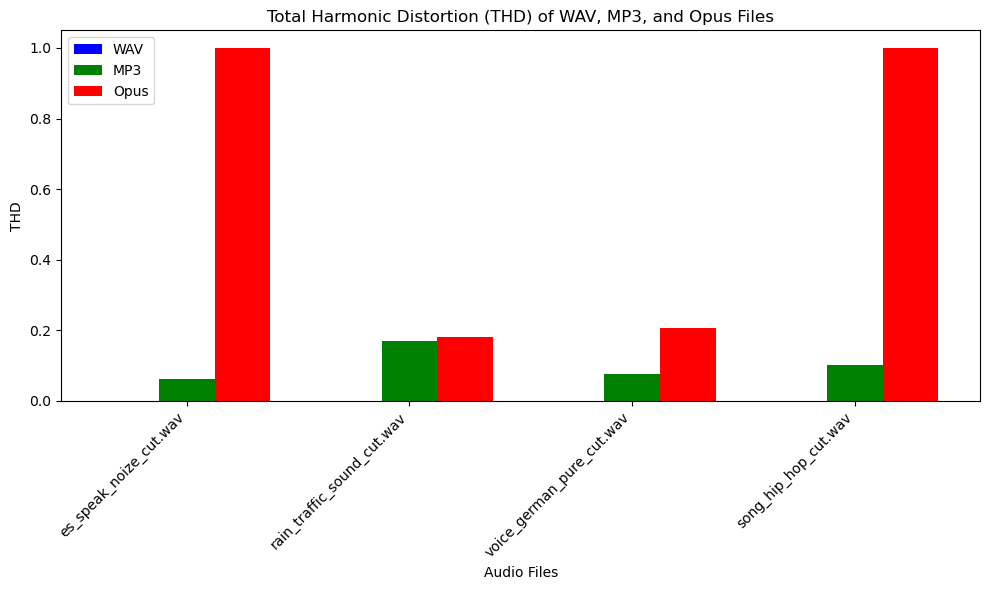

In [26]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def calculate_thd(original_audio, processed_audio):
    thd = np.sqrt(np.mean((processed_audio - original_audio) ** 2)) / np.sqrt(np.mean(original_audio ** 2))
    return thd

# Directories containing the original WAV files and processed MP3/Opus files
wav_directory = 'test'
mp3_directory = 'mp3'
opus_directory = 'opus'

# Get a list of WAV files in the 'test' directory
wav_files = [file for file in os.listdir(wav_directory) if file.endswith('.wav')]

# Lists to store THD values and corresponding file names
thd_values = {'WAV': [], 'MP3': [], 'Opus': []}
file_names = []

# Process each corresponding pair of WAV, MP3, and Opus files
for wav_file in wav_files:
    wav_path = os.path.join(wav_directory, wav_file)
    mp3_file = os.path.splitext(wav_file)[0] + '.mp3'
    mp3_path = os.path.join(mp3_directory, mp3_file)
    opus_file = os.path.splitext(wav_file)[0] + '.opus'
    opus_path = os.path.join(opus_directory, opus_file)

    # Load the original WAV audio file
    original_audio, sr = librosa.load(wav_path, sr=None)

    # Load the processed MP3 audio file
    processed_audio_mp3, sr_mp3 = librosa.load(mp3_path, sr=None)

    # Load the processed Opus audio file
    processed_audio_opus, sr_opus = librosa.load(opus_path, sr=None)

    # Ensure all audio signals have the same length
    min_length = min(len(original_audio), len(processed_audio_mp3), len(processed_audio_opus))
    original_audio = original_audio[:min_length]
    processed_audio_mp3 = processed_audio_mp3[:min_length]
    processed_audio_opus = processed_audio_opus[:min_length]

    # Calculate the Total Harmonic Distortion (THD) for MP3 and Opus
    thd_mp3 = calculate_thd(original_audio, processed_audio_mp3)
    thd_opus = calculate_thd(original_audio, processed_audio_opus)
    
    # Append THD values and file name to the lists
    thd_values['WAV'].append(0)  # WAV to WAV comparison always yields 0 THD
    thd_values['MP3'].append(thd_mp3)
    thd_values['Opus'].append(thd_opus)
    file_names.append(wav_file)

# Create a bar graph to visualize THD values for each format
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(wav_files))

plt.bar(index, thd_values['WAV'], bar_width, label='WAV', color='b')
plt.bar(index + bar_width, np.clip(thd_values['MP3'], 0, 1), bar_width, label='MP3', color='g')
plt.bar(index + 2 * bar_width, np.clip(thd_values['Opus'], 0, 1), bar_width, label='Opus', color='r')

plt.xlabel('Audio Files')
plt.ylabel('THD')
plt.title('Total Harmonic Distortion (THD) of WAV, MP3, and Opus Files')
plt.xticks(index + bar_width, file_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## Frequency response

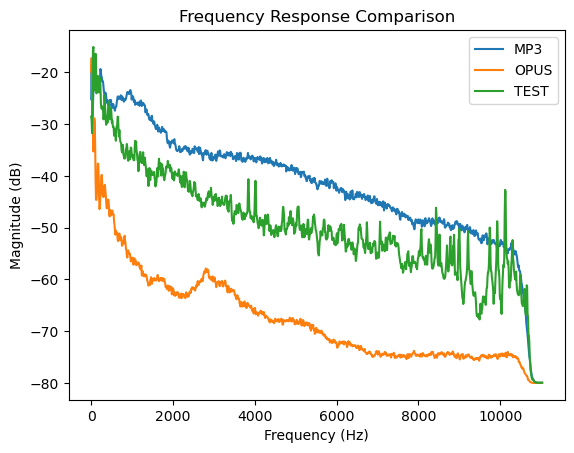

In [42]:
import os
import librosa
import matplotlib.pyplot as plt

def plot_frequency_response(file_paths, labels):
    for path, label in zip(file_paths, labels):
        y, sr = librosa.load(path)
        D = librosa.stft(y)
        freqs = librosa.amplitude_to_db(librosa.magphase(D)[0], ref=np.max)
        plt.plot(librosa.fft_frequencies(sr=sr, n_fft=2048), freqs.mean(axis=1), label=label)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Frequency Response Comparison')
    plt.legend()
    plt.show()

# Define the paths to the directories
mp3_folder = 'mp3'
opus_folder = 'opus'
test_folder = 'test'

# Get file paths from each directory
mp3_files = [os.path.join(mp3_folder, file) for file in os.listdir(mp3_folder) if file.endswith('.mp3')]
opus_files = [os.path.join(opus_folder, file) for file in os.listdir(opus_folder) if file.endswith('.opus')]
test_files = [os.path.join(test_folder, file) for file in os.listdir(test_folder) if file.endswith('.wav')]

# Plotting the frequency response
plot_frequency_response(mp3_files + opus_files + test_files, ['MP3', 'OPUS', 'TEST'])


## Bitrate

In [37]:
import os
import wave

folder_path = 'test'
wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    with wave.open(file_path, 'rb') as wav:
        bitrate = wav.getframerate()
        print(f"Bitrate of {wav_file}: {bitrate} Hz")


Bitrate of voice_german_pure_cut_24kHz.wav: 24000 Hz
Bitrate of rain_traffic_sound_cut_48khz.wav: 48000 Hz
Bitrate of song_hip_hop_cut_48khz.wav: 44100 Hz
Bitrate of es_speak_noize_cut_48khz.wav: 44100 Hz
Bitrate of ar_speak_radio_quran_long.wav: 7119 Hz
Bitrate of voice_german_pure_cut_48khz.wav: 48000 Hz
Bitrate of es_speak_noize_cut_24kHz.wav: 24000 Hz
Bitrate of rain_traffic_sound_cut_24kHz.wav: 24000 Hz
Bitrate of song_hip_hop_cut_24kHz.wav: 24000 Hz


In [35]:
from pydub import AudioSegment
import os

folder_path = 'test'
output_sample_rate = 24000  # Desired sample rate (24kHz)

# Check if the 'test' directory exists
if not os.path.exists(folder_path):
    print(f"Directory '{folder_path}' does not exist.")
    exit()

# Get all audio files (assuming they are in WAV format)
wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Convert each audio file to 24kHz
for wav_file in wav_files:
    input_path = os.path.join(folder_path, wav_file)
    output_path = os.path.join(folder_path, f"{os.path.splitext(wav_file)[0]}_24kHz.wav")

    # Load the audio file
    audio = AudioSegment.from_wav(input_path)

    # Set the desired sample rate
    audio = audio.set_frame_rate(output_sample_rate)

    # Export the converted audio file
    audio.export(output_path, format="wav")

    print(f"Converted {wav_file} to {output_sample_rate} Hz")


Converted rain_traffic_sound_cut_48khz.wav to 24000 Hz
Converted song_hip_hop_cut_48khz.wav to 24000 Hz
Converted es_speak_noize_cut_48khz.wav to 24000 Hz
Converted voice_german_pure_cut_48khz.wav to 24000 Hz


## FLAC

In [207]:
from pydub import AudioSegment
import os
import time

# Directories
input_folder = 'test'
output_folder = 'flac'

# Create 'flac' directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all WAV files in the 'test' directory
wav_files = [file for file in os.listdir(input_folder) if file.endswith('.wav')]

# Convert each WAV file to FLAC
for wav_file in wav_files:
    input_path = os.path.join(input_folder, wav_file)
    output_path = os.path.join(output_folder, os.path.splitext(wav_file)[0] + '.flac')

    # Load the WAV audio
    start_time = time.time()  # Start time
    audio = AudioSegment.from_wav(input_path)
    end_time = time.time()  # End time for loading WAV

    # Export the audio to FLAC format
    start_export_time = time.time()  # Start time for exporting FLAC
    audio.export(output_path, format="flac")
    end_export_time = time.time()  # End time for exporting FLAC

    # Calculate processing time and compression ratio
    loading_time = end_time - start_time
    export_time = end_export_time - start_export_time
    total_time = loading_time + export_time

    wav_size = os.path.getsize(input_path)
    flac_size = os.path.getsize(output_path)
    compression_ratio = ( wav_size/ flac_size)  # Calculate compression ratio as a percentage

    print(f"Converted {wav_file} to FLAC")
    print(f"Compression Ratio: {compression_ratio:.2f}")
    print(f"Processing Time (Load WAV): {loading_time:.2f} seconds")
    print(f"Processing Time (Export FLAC): {export_time:.2f} seconds")
    print(f"Total Processing Time: {total_time:.2f} seconds\n")


Converted voice_german_pure_cut_24kHz.wav to FLAC
Compression Ratio: 1.80
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export FLAC): 0.06 seconds
Total Processing Time: 0.06 seconds

Converted rain_traffic_sound_cut_48khz.wav to FLAC
Compression Ratio: 1.78
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export FLAC): 0.06 seconds
Total Processing Time: 0.06 seconds

Converted ar_speak_radio_quran_long_8khz.wav to FLAC
Compression Ratio: 1.61
Processing Time (Load WAV): 1.18 seconds
Processing Time (Export FLAC): 0.27 seconds
Total Processing Time: 1.44 seconds

Converted song_hip_hop_cut_48khz.wav to FLAC
Compression Ratio: 1.40
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export FLAC): 0.06 seconds
Total Processing Time: 0.06 seconds

Converted es_speak_noize_cut_48khz.wav to FLAC
Compression Ratio: 1.99
Processing Time (Load WAV): 0.00 seconds
Processing Time (Export FLAC): 0.05 seconds
Total Processing Time: 0.05 seconds

Converted voice_german_p